<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/0411_%EC%84%B8%EC%85%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습문제 3

Q. K-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.

A. 첫번째 방법은 엘보 규칙에 따라 클러스터 개수의 함수로 이너셔를 그리고 그래프에서 이너셔가 더는 빠르게 감소하지 않는 지점(엘보)를 찾는 방법입니다. 두번째는 클러스터 개수의 함수로 실루엣 점수를 그래프로 그리는 방법입니다. 그래프에 뾰족하게 올라간 지점 근처가 일반적으로 최적의 클러스터 개수입니다. 실루엣 점수는 모든 샘플에 대한 평균 실루엣 계수로, 실루엣 계수가 1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와 멀리 떨어져 있고, 실루엣 계수가 -1에 가까우면 샘플이 잘못된 클러스터에 할당되어 있는 것입니다.

## 연습문제 5

Q. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘을 두 개 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두개는 무엇인가요?

A.
대규모 데이터셋에 적용할 수 있는 알고리즘: k-평균, BIRCH

밀도가 높은 지역에 적용할 수 있는 알고리즘: DBSCAN, 평균-이동 알고리즘

## 연습문제 8

Q. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?

A. 가우시안 혼합 모델이란 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델입니다. 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 타원형 클러스트를 생성합니다. 샘플이 어떤 클러스터에 속해 있는지는 알지 못하지만 밀집도 추정, 군집, 이상치 탐지에 이 모델을 사용할 수 있습니다.

## 연습문제 10

In [1]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


계층적 샘플링: 모집단의 데이터 분포 비율을 유지하면서 데이터를 샘플링하는 것

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_vaild_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_vaild_idx]
y_train_valid = olivetti.target[train_vaild_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]


In [11]:
from sklearn.cluster import KMeans

k_range = range(5,150,5)
kmeans_per_k = []
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
  kmeans_per_k.append(kmeans)

In [12]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)

In [14]:
k_range[best_index]

110

In [15]:
best_model = kmeans_per_k[best_index]

Cluster 0


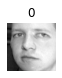

Cluster 1


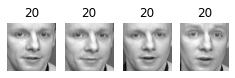

Cluster 2


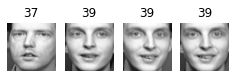

Cluster 3


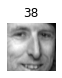

Cluster 4


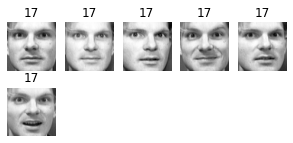

Cluster 5


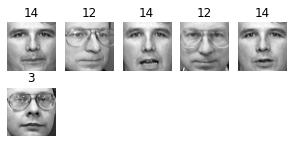

Cluster 6


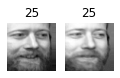

Cluster 7


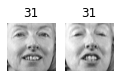

Cluster 8


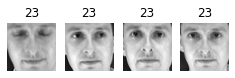

Cluster 9


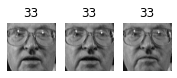

Cluster 10


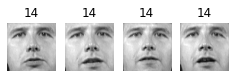

Cluster 11


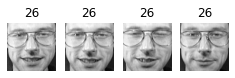

Cluster 12


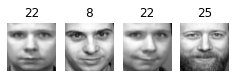

Cluster 13


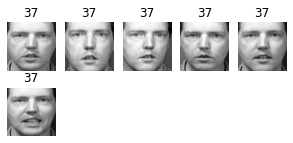

Cluster 14


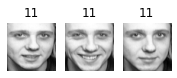

Cluster 15


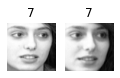

Cluster 16


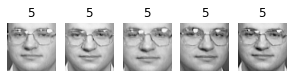

Cluster 17


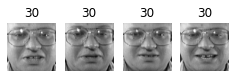

Cluster 18


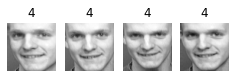

Cluster 19


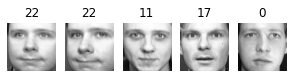

Cluster 20


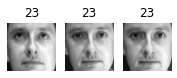

Cluster 21


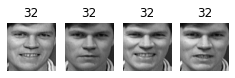

Cluster 22


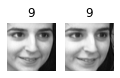

Cluster 23


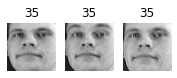

Cluster 24


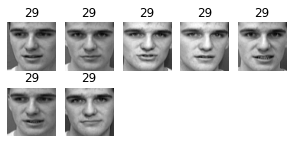

Cluster 25


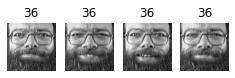

Cluster 26


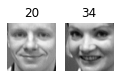

Cluster 27


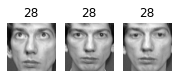

Cluster 28


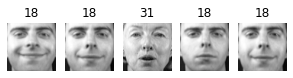

Cluster 29


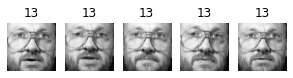

Cluster 30


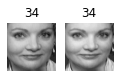

Cluster 31


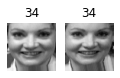

Cluster 32


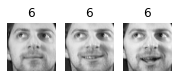

Cluster 33


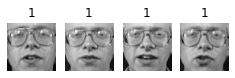

Cluster 34


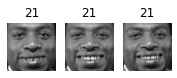

Cluster 35


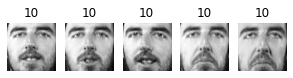

Cluster 36


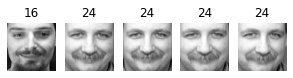

Cluster 37


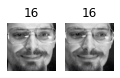

Cluster 38


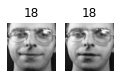

Cluster 39


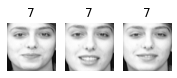

Cluster 40


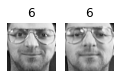

Cluster 41


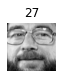

Cluster 42


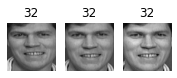

Cluster 43


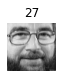

Cluster 44


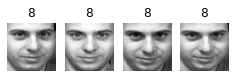

Cluster 45


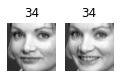

Cluster 46


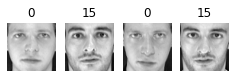

Cluster 47


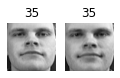

Cluster 48


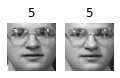

Cluster 49


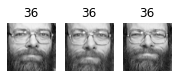

Cluster 50


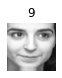

Cluster 51


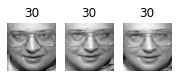

Cluster 52


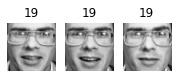

Cluster 53


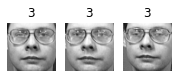

Cluster 54


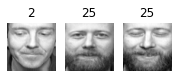

Cluster 55


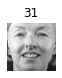

Cluster 56


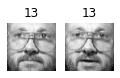

Cluster 57


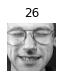

Cluster 58


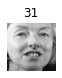

Cluster 59


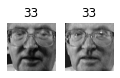

Cluster 60


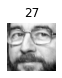

Cluster 61


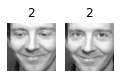

Cluster 62


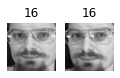

Cluster 63


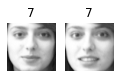

Cluster 64


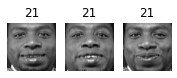

Cluster 65


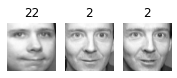

Cluster 66


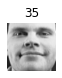

Cluster 67


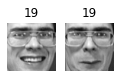

Cluster 68


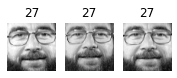

Cluster 69


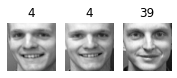

Cluster 70


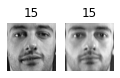

Cluster 71


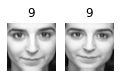

Cluster 72


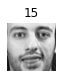

Cluster 73


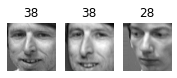

Cluster 74


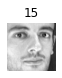

Cluster 75


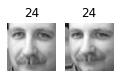

Cluster 76


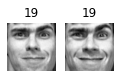

Cluster 77


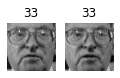

Cluster 78


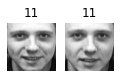

Cluster 79


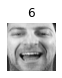

Cluster 80


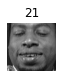

Cluster 81


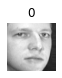

Cluster 82


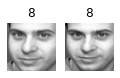

Cluster 83


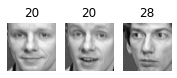

Cluster 84


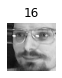

Cluster 85


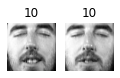

Cluster 86


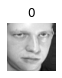

Cluster 87


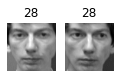

Cluster 88


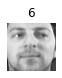

Cluster 89


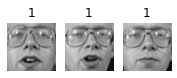

Cluster 90


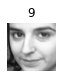

Cluster 91


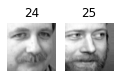

Cluster 92


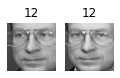

Cluster 93


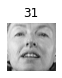

Cluster 94


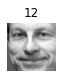

Cluster 95


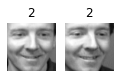

Cluster 96


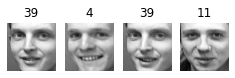

Cluster 97


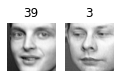

Cluster 98


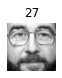

Cluster 99


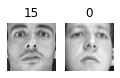

Cluster 100


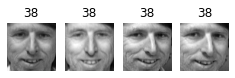

Cluster 101


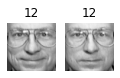

Cluster 102


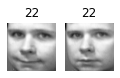

Cluster 103


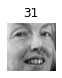

Cluster 104


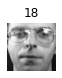

Cluster 105


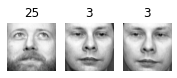

Cluster 106


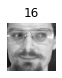

Cluster 107


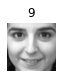

Cluster 108


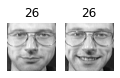

Cluster 109


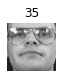

In [17]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
  faces = faces.reshape(-1,64,64)
  n_rows = (len(faces)-1) // n_cols + 1
  plt.figure(figsize=(n_cols, n_rows*1.1))
  for index, (face, label) in enumerate(zip(faces, labels)):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(face, cmap="gray")
    plt.axis("off")
    plt.title(label)

  plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## 연습문제 11

k-평균을 차원 축소 도구로 사용하여 축소된 세트에서 분류기를 훈련

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 150, random_state =42)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid)

0.9375

In [20]:
X_train_reduced = best_model.transform(X_train)
X_valid_reduced = best_model.transform(X_valid)
X_test_reduced = best_model.transform(X_test)

clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.7

In [22]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
  pipeline = Pipeline([
                       ('kmeans',KMeans(n_clusters, random_state=42)),
                       ('forest_clf', RandomForestClassifier(n_estimators=150, random_state=42))
  ])
  pipeline.fit(X_train, y_train)
  print(n_clusters, pipeline.score(X_valid, y_valid))

5 0.525
10 0.625
15 0.725
20 0.75
25 0.8
30 0.7375
35 0.7125
40 0.825
45 0.7625
50 0.775
55 0.775
60 0.775
65 0.8125
70 0.7875
75 0.8
80 0.8125
85 0.8375
90 0.825
95 0.825
100 0.8125
105 0.8
110 0.775
115 0.8375
120 0.775
125 0.7875
130 0.8375
135 0.7875
140 0.825
145 0.8125


In [23]:
X_train_extended = np.c_[X_train, X_train_reduced]
X_valid_extended = np.c_[X_valid, X_valid_reduced]
X_test_extended = np.c_[X_test, X_test_reduced]

In [24]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.9125